In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

from processor.dart import DART_FUNDAMENTAL_PROCESSOR
from processor.fdr import FDR_INFO_PROCESSOR, FDR_OHLCV_PREPROCESSOR
from processor.factor.fundamental import FUNDAMENTAL_FACTOR_PROCESSOR

from analyser.factor import FACTOR_ANALYSER

In [10]:
CFG = {
    "analysis_date": "2023-11-01",
    "FUNDAMENTAL_FACTOR_CFG": {
        "ohlcv_recent_n": 10,
    },
    "FACTOR_ANALYSIS_CFG": {
        "profit_recent_n": 20,
    },
}

In [11]:
# dart_fundamental
dart_fundamental_df = pd.read_csv("./data/dart_fundamental_df.csv", index_col=0)
dart_fundamental_processor = DART_FUNDAMENTAL_PROCESSOR(dart_fundamental_df)

In [12]:
# fdr_info
fdr_info_df = pd.read_csv("./data/fdr_info_df.csv", index_col=0)
fdr_info_processor = FDR_INFO_PROCESSOR(fdr_info_df)

In [13]:
# fdr_ohlcv
fdr_ohlcv_df = pd.read_csv("./data/fdr_ohlcv_df.csv", index_col=0)
fdr_ohlcv_preprocessor = FDR_OHLCV_PREPROCESSOR(fdr_ohlcv_df)
pps_fdr_ohlcv_df = fdr_ohlcv_preprocessor.get_pps_fdr_ohlcv_df()

In [14]:
# split ohlcv
future_ohlcv_df = pps_fdr_ohlcv_df[CFG["analysis_date"] < pps_fdr_ohlcv_df["Date"]].copy()

ohlcv_df = pps_fdr_ohlcv_df[pps_fdr_ohlcv_df["Date"] < CFG["analysis_date"]].copy()

In [15]:
# get fundamental_factors_df
fundamental_factor_processor = FUNDAMENTAL_FACTOR_PROCESSOR(ohlcv_df, dart_fundamental_processor, fdr_info_processor)
fundamental_factors_df = fundamental_factor_processor.get_fundamental_factor_df(CFG["FUNDAMENTAL_FACTOR_CFG"])

In [16]:
# Analysis
factor_analyser = FACTOR_ANALYSER(fundamental_factors_df)

<Axes: >

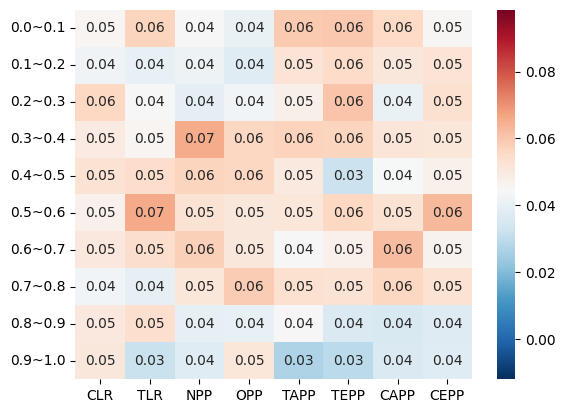

In [17]:
# 1D analysis
profit_row = factor_analyser.get_profit_row(
    factor_analyser.get_recent_ohlcv_df(future_ohlcv_df, CFG["FACTOR_ANALYSIS_CFG"]["profit_recent_n"])
)
sns.heatmap(
    factor_analyser.get_profit_analysis_1d_df(future_ohlcv_df, CFG["FACTOR_ANALYSIS_CFG"]),
    annot=True,
    cmap="RdBu_r",
    vmin=profit_row.quantile(0.2),
    vmax=profit_row.quantile(0.8),
    center=profit_row.mean(),
    fmt=".2f",
)

In [18]:
factors = [col for col in fundamental_factors_df.columns if col != "StockCode"]
factor_combs = list(combinations(factors, 2))

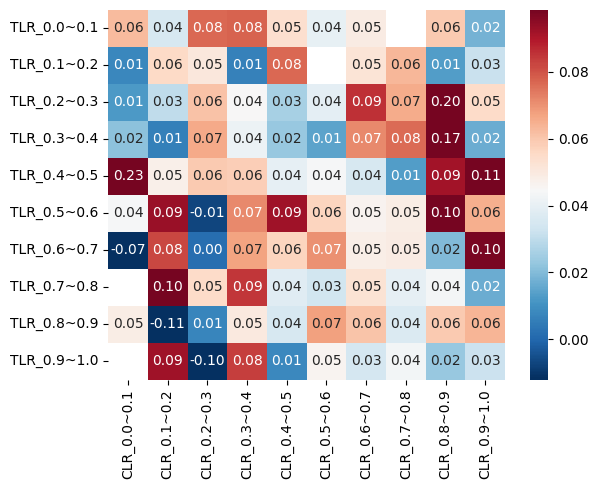

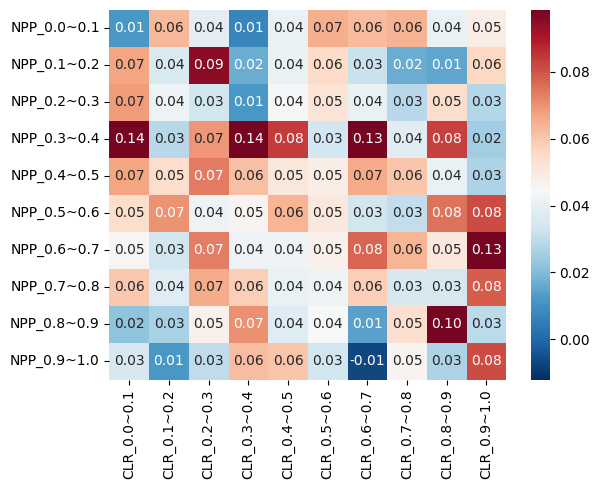

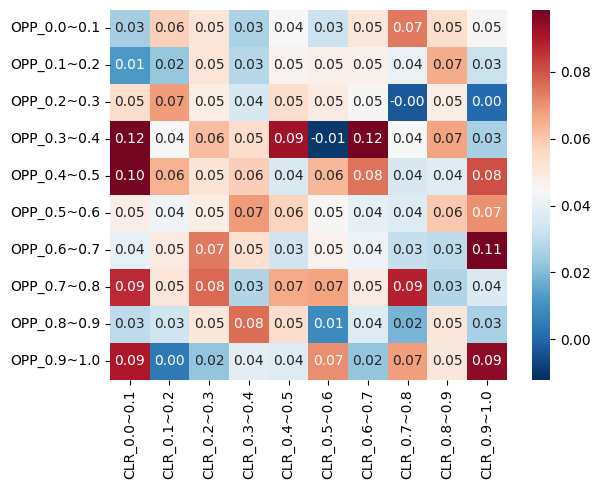

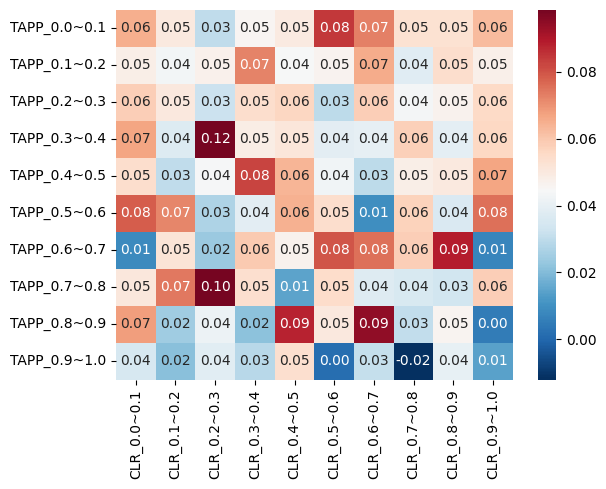

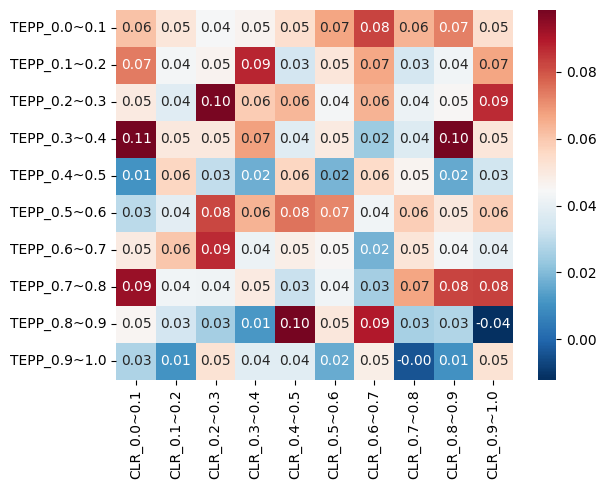

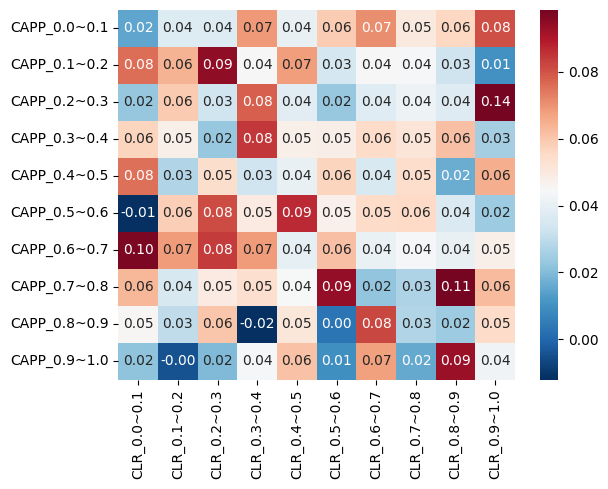

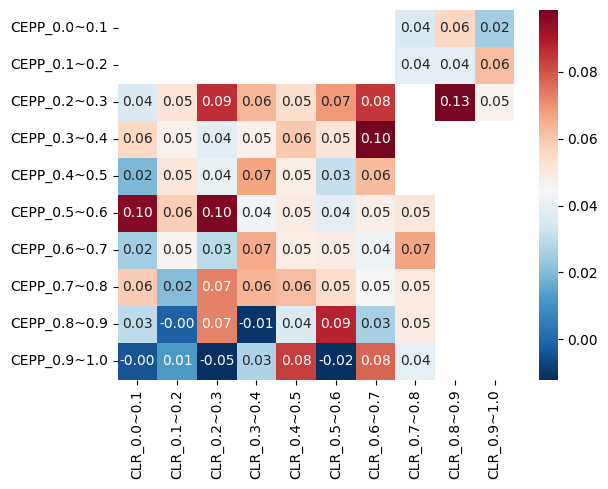

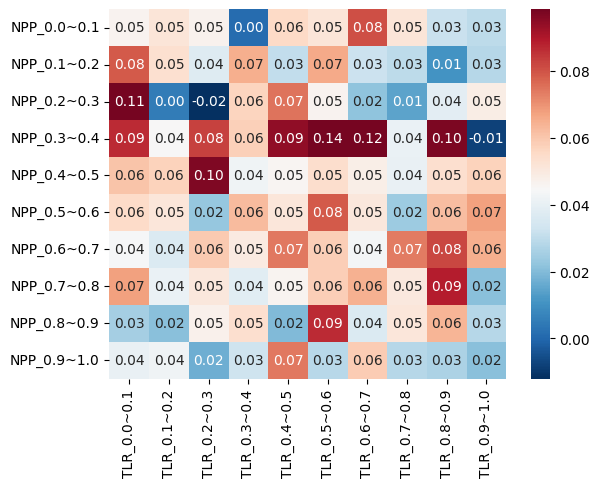

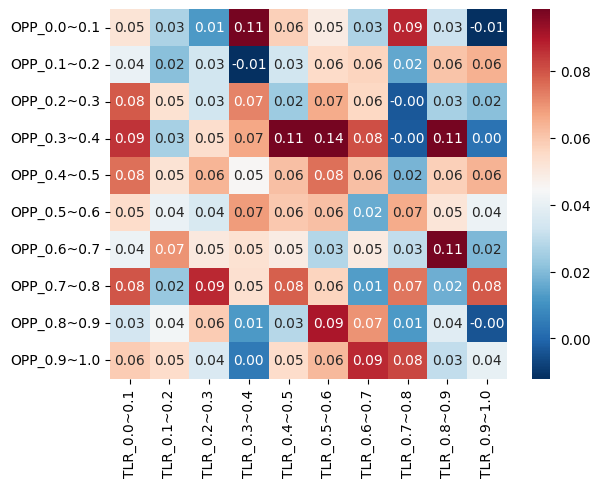

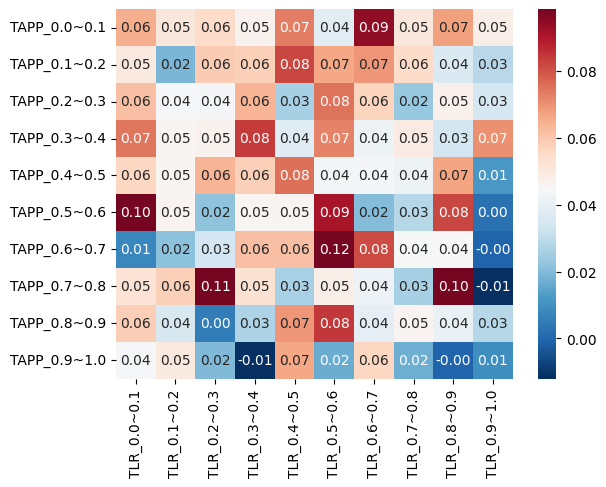

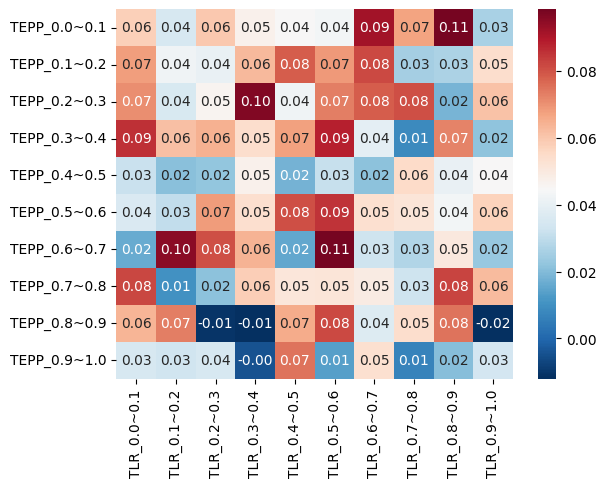

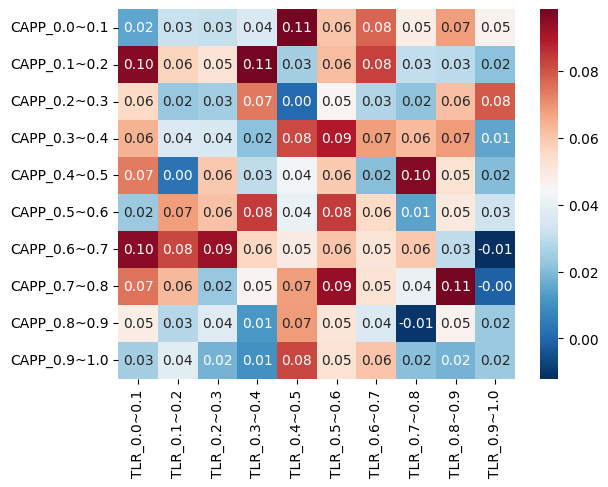

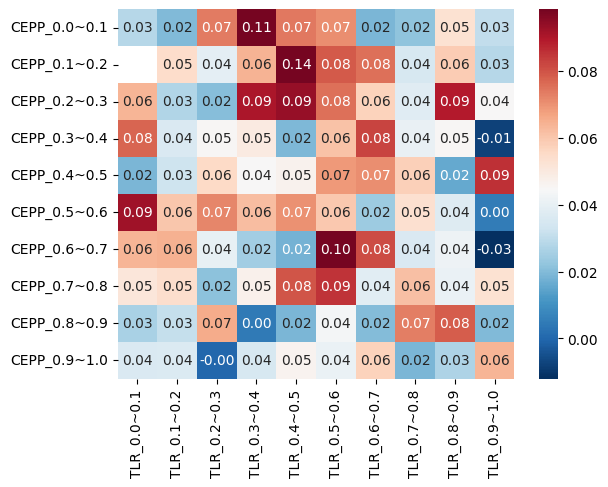

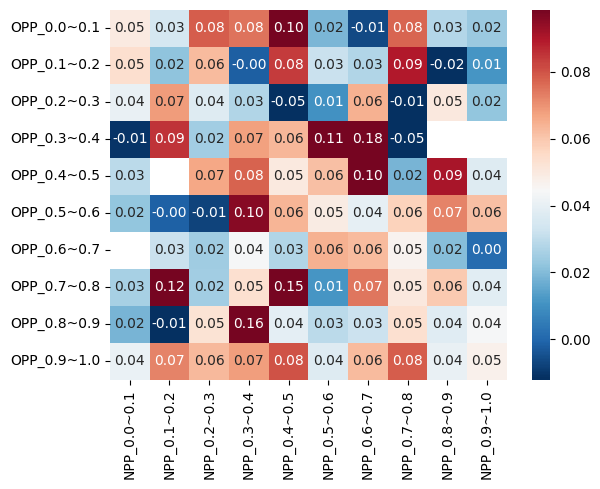

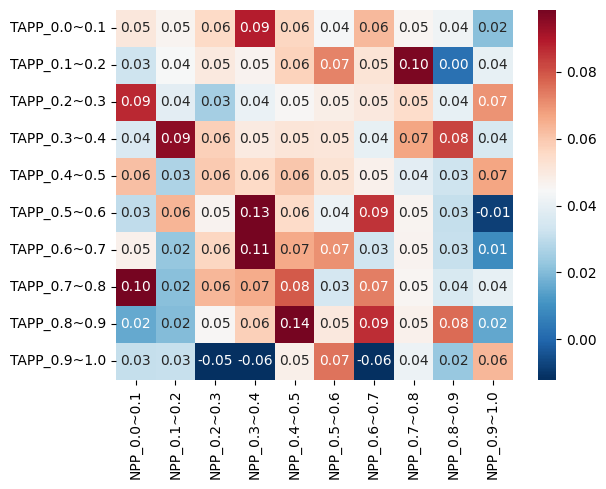

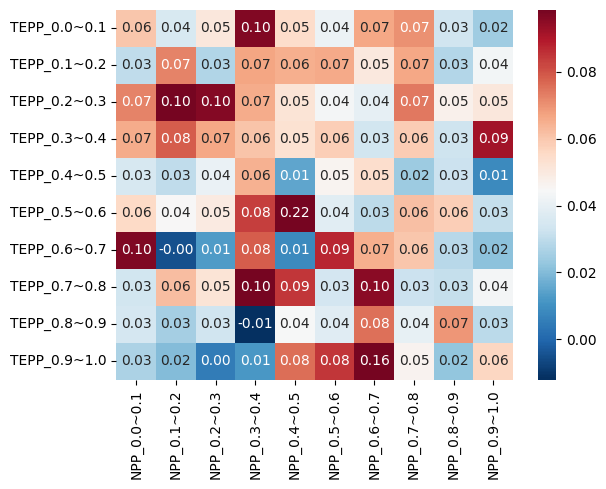

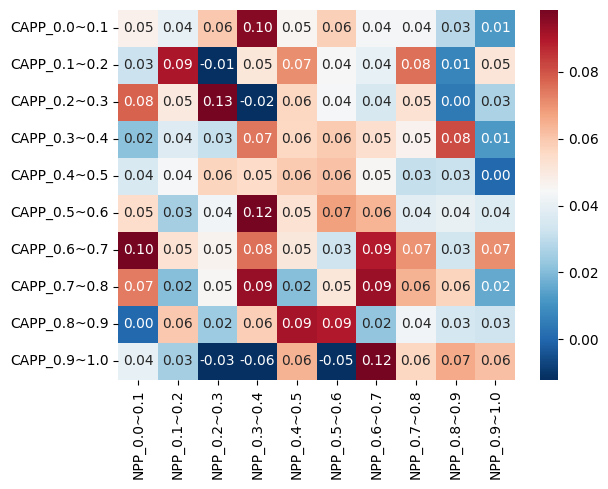

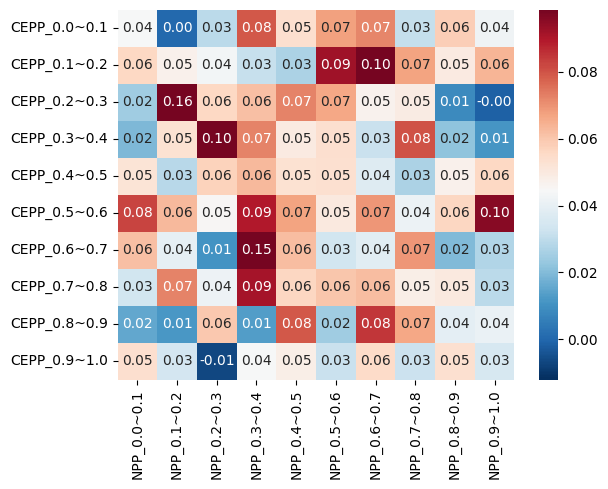

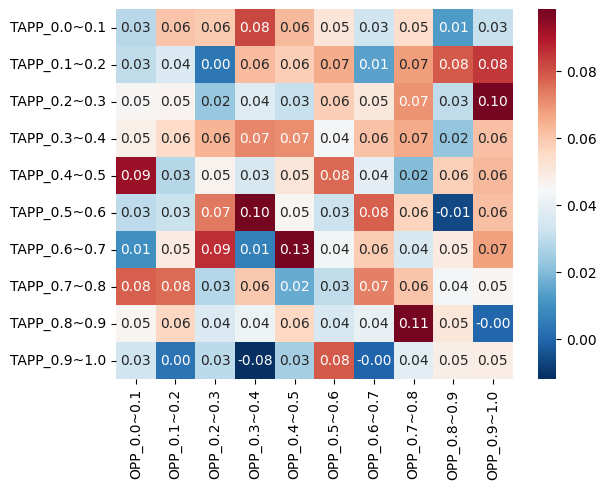

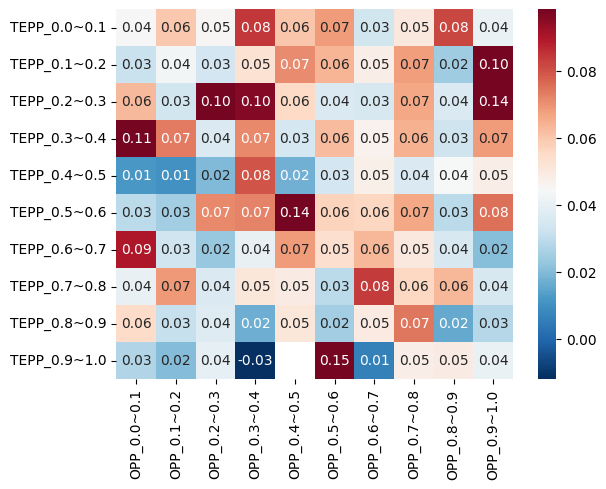

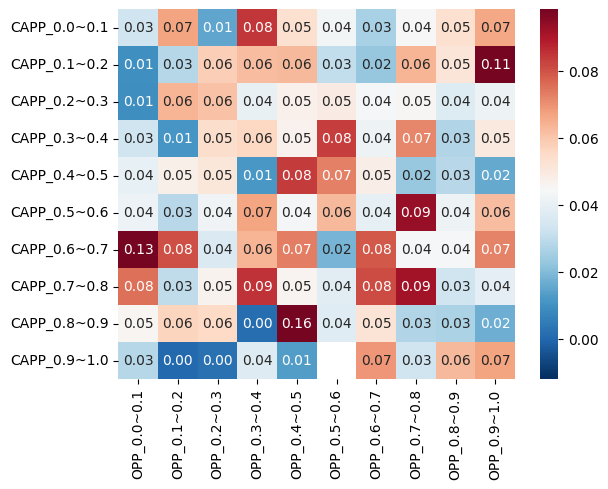

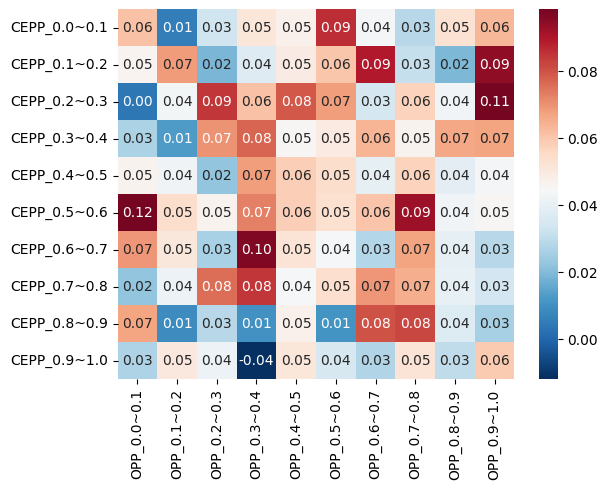

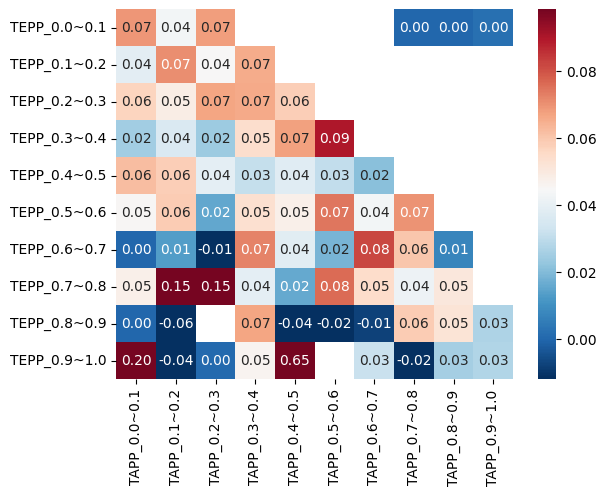

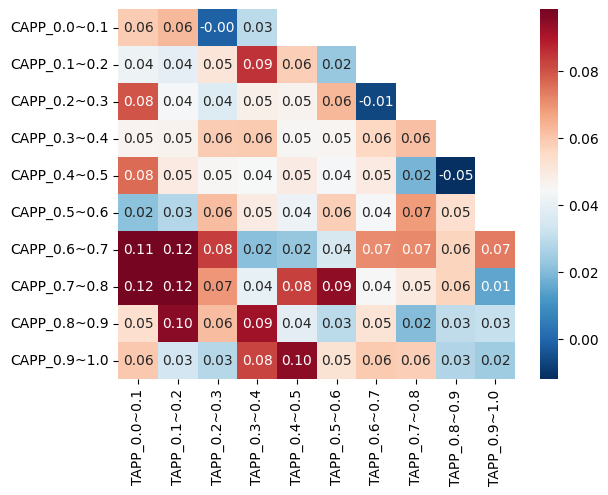

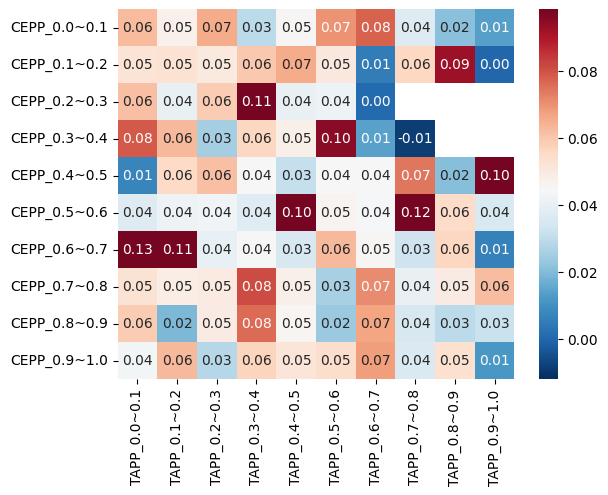

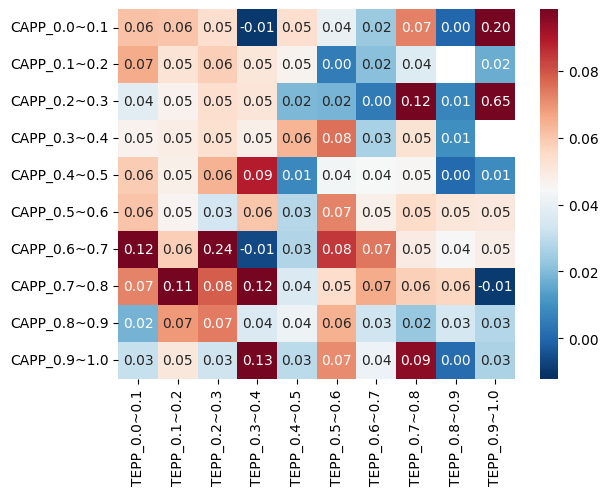

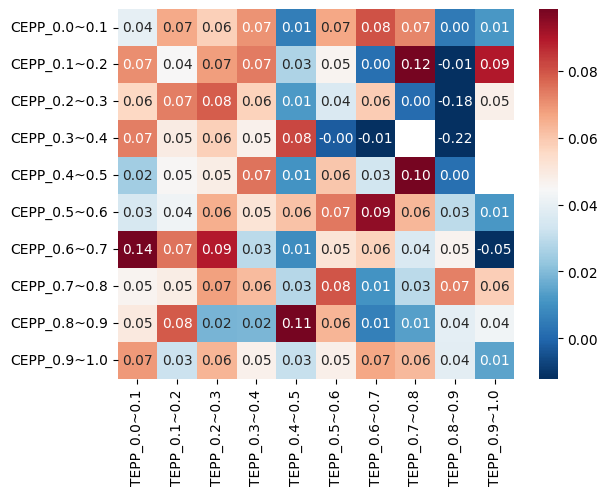

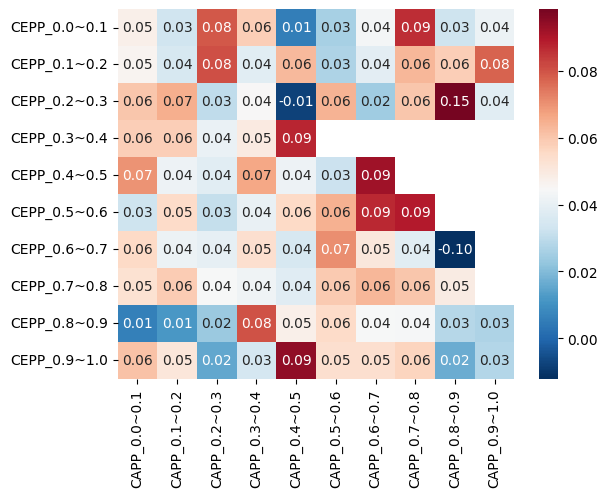

In [19]:
for factor_comb in [comb for comb in factor_combs]:
    profit_analysis_2d_df = factor_analyser.get_profit_analysis_2d_df(
        future_ohlcv_df, CFG["FACTOR_ANALYSIS_CFG"], factor_comb
    )
    sns.heatmap(
        profit_analysis_2d_df,
        annot=True,
        cmap="RdBu_r",
        vmin=profit_row.quantile(0.2),
        vmax=profit_row.quantile(0.8),
        center=profit_row.mean(),
        fmt=".2f",
    )
    plt.show()